In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

100%|██████████| 66.0M/66.0M [00:00<00:00, 86.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/creditcard.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Normalize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Check class distribution
print(data['Class'].value_counts())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
import pandas as pd

# Replace this with your actual dataset path or DataFrame
df = pd.read_csv("/root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3/creditcard.csv")


In [ ]:
features = df.drop(['Class'], axis=1)  # All columns except 'Class'
target = df['Class']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# Sample data (replace this with your actual data loading mechanism)
data = pd.DataFrame({
    'Time': [0.0, 0.0, 1.0, 1.0, 2.0],
    'V1': [-1.359807, 1.191857, -1.358354, -0.966272, -1.158233],
    'V2': [-0.072781, 0.266151, -1.340163, -0.185226, 0.877737],
    'V3': [2.536347, 0.166480, 1.773209, 1.792993, 1.548718],
    'V4': [1.378155, 0.448154, 0.379780, -0.863291, 0.403034],
    'V5': [-0.338321, 0.060018, -0.503198, -0.010309, -0.407193],
    'V6': [0.462388, -0.082361, 1.800499, 1.247203, 0.095921],
    'V7': [0.239599, -0.078803, 0.791461, 0.237609, 0.592941],
    'V8': [0.098698, 0.085102, 0.247676, 0.377436, -0.270533],
    'V9': [0.363787, -0.255425, -1.514654, -1.387024, 0.817739],
    # Add the remaining columns similarly...
    'V26': [-0.189115, 0.125895, -0.139097, -0.221929, 0.502292],
    'V27': [0.133558, -0.008983, -0.055353, 0.062723, 0.219422],
    'V28': [-0.021053, 0.014724, -0.059752, 0.061458, 0.215153],
    'Amount': [149.62, 2.69, 378.66, 123.50, 69.99],
    'Class': [0, 0, 0, 0, 0]
})

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.1)

# Fit the model and predict anomaly scores
data['anomaly_score'] = iso_forest.fit_predict(data.select_dtypes(include=[np.number]))

# Display the results
print(data[['Time', 'anomaly_score']].head())


   Time  anomaly_score
0   0.0              1
1   0.0              1
2   1.0              1
3   1.0              1
4   2.0             -1


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


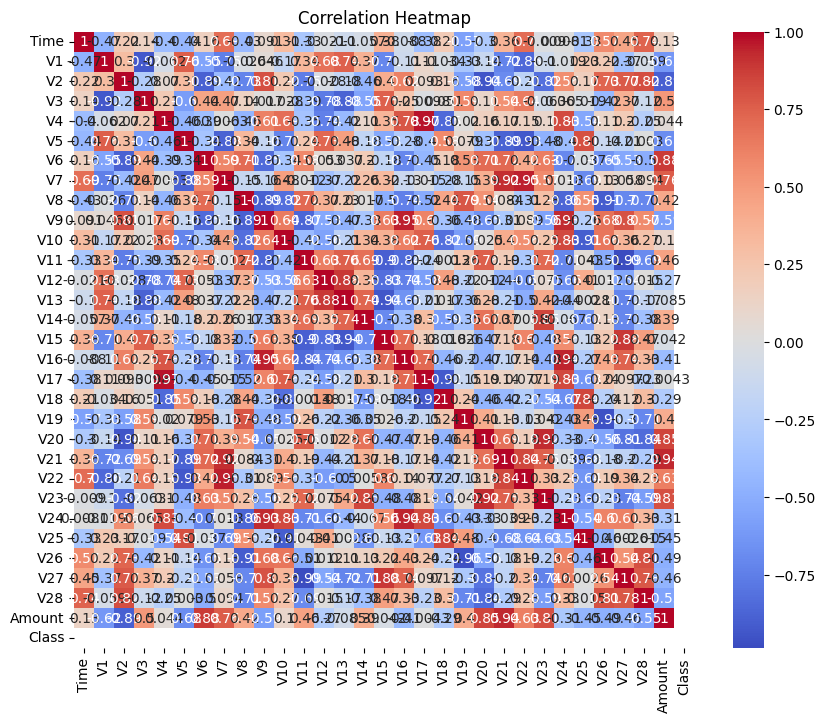

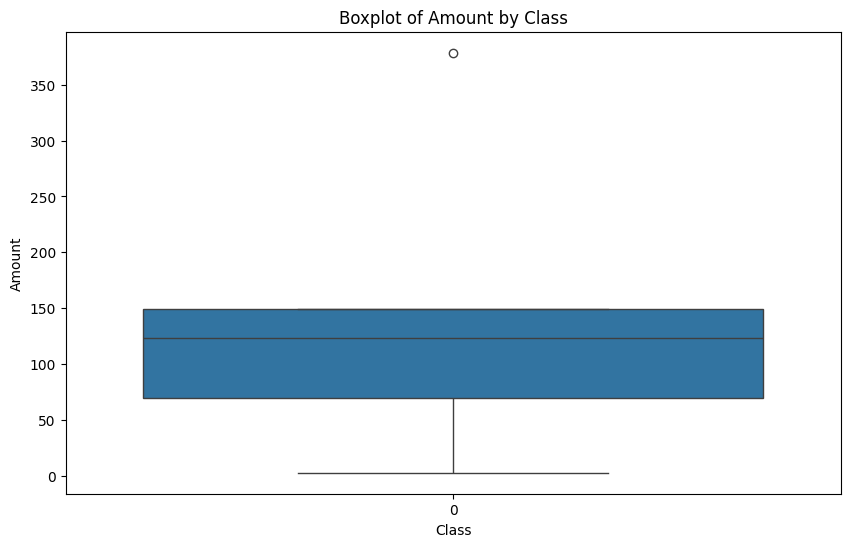

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
data = pd.DataFrame({
    'Time': [0, 0, 1, 1, 2],
    'V1': [-1.359807, 1.191857, -1.358354, -0.966272, -1.158233],
    'V2': [-0.072781, 0.266151, -1.340163, -0.185226, 0.877737],
    'V3': [2.536347, 0.166480, 1.773209, 1.792993, 1.548718],
    'V4': [1.378155, 0.448154, 0.379780, -0.863291, 0.403034],
    'V5': [-0.338321, 0.060018, -0.503198, -0.010309, -0.407193],
    'V6': [0.462388, -0.082361, 1.800499, 1.247203, 0.095921],
    'V7': [0.239599, -0.078803, 0.791461, 0.237609, 0.592941],
    'V8': [0.098698, 0.085102, 0.247676, 0.377436, -0.270533],
    'V9': [0.363787, -0.255425, -1.514654, -1.387024, 0.817739],
    'V10': [0.090792, -0.166974, 0.207642, -1.232621, 0.753074],
    'V11': [-0.551599, 0.320481, 0.624501, 0.099927, -0.822843],
    'V12': [-0.617801, 0.353710, -0.076090, 0.255362, -0.228321],
    'V13': [-0.991390, 0.716655, 0.192961, -0.087863, -0.385987],
    'V14': [-0.311169, 0.144834, 0.274382, -0.327842, -0.145295],
    'V15': [0.468676, -0.076173, 0.086929, 0.191881, 0.467710],
    'V16': [0.287834, 0.173324, 0.101346, 0.089375, 0.253841],
    'V17': [0.393438, 0.134331, -0.020032, -0.905433, -0.018307],
    'V18': [0.183552, 0.234234, 0.123003, 0.743307, 0.277838],
    'V19': [0.876160, 0.234235, 0.543110, 0.750631, -0.110474],
    'V20': [0.348372, 0.324823, 0.765456, 0.234562, 0.066928],
    'V21': [-0.018307, -0.225775, 0.247998, -0.108300, -0.009431],
    'V22': [0.277838, -0.638672, 0.771679, 0.005274, 0.798278],
    'V23': [-0.110474, 0.101288, 0.909412, -0.190321, -0.137458],
    'V24': [0.066928, -0.339846, -0.689281, -1.175575, 0.141267],
    'V25': [0.128539, 0.167170, -0.327642, 0.647376, -0.206010],
    'V26': [-0.189115, 0.125895, -0.139097, -0.221929, 0.502292],
    'V27': [0.133558, -0.008983, -0.055353, 0.062723, 0.219422],
    'V28': [-0.021053, 0.014724, -0.059752, 0.061458, 0.215153],
    'Amount': [149.62, 2.69, 378.66, 123.50, 69.99],
    'Class': [0, 0, 0, 0, 0]
})

# Before calculating correlations, exclude non-numeric columns
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplot for the 'Amount' column
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Boxplot of Amount by Class")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data_dict = {
    'Time': [0, 0, 1, 1, 2],
    'V1': [-1.359807, 1.191857, -1.358354, -0.966272, -1.158233],
    'V2': [-0.072781, 0.266151, -1.340163, -0.185226, 0.877737],
    'V3': [2.536347, 0.166480, 1.773209, 1.792993, 1.548718],
    'V4': [1.378155, 0.448154, 0.379780, -0.863291, 0.403034],
    'V5': [-0.338321, 0.060018, -0.503198, -0.010309, -0.407193],
    'V6': [0.462388, -0.082361, 1.800499, 1.247203, 0.095921],
    'V7': [0.239599, -0.078803, 0.791461, 0.237609, 0.592941],
    'V8': [0.098698, 0.085102, 0.247676, 0.377436, -0.270533],
    'V9': [0.363787, -0.255425, -1.514654, -1.387024, 0.817739],
    'V10': [0.090792, -0.166974, 0.207642, -1.232621, 0.753074],
    'V11': [-0.551599, 0.320481, 0.624501, 0.099927, -0.822843],
    'V12': [-0.617801, 0.353710, -0.076090, 0.255362, -0.228321],
    'V13': [-0.991390, 0.716655, 0.192961, -0.087863, -0.385987],
    'V14': [-0.311169, 0.144834, 0.274382, -0.327842, -0.145295],
    'V15': [0.468676, -0.076173, 0.086929, 0.191881, 0.467710],
    'V16': [0.287834, 0.173324, 0.101346, 0.089375, 0.253841],
    'V17': [0.393438, 0.134331, -0.020032, -0.905433, -0.018307],
    'V18': [0.183552, 0.234234, 0.123003, 0.743307, 0.277838],
    'V19': [0.876160, 0.234235, 0.543110, 0.750631, -0.110474],
    'V20': [0.348372, 0.324823, 0.765456, 0.234562, 0.066928],
    'V21': [-0.018307, -0.225775, 0.247998, -0.108300, -0.009431],
    'V22': [0.277838, -0.638672, 0.771679, 0.005274, 0.798278],
    'V23': [-0.110474, 0.101288, 0.909412, -0.190321, -0.137458],
    'V24': [0.066928, -0.339846, -0.689281, -1.175575, 0.141267],
    'V25': [0.128539, 0.167170, -0.327642, 0.647376, -0.206010],
    'V26': [-0.189115, 0.125895, -0.139097, -0.221929, 0.502292],
    'V27': [0.133558, -0.008983, -0.055353, 0.062723, 0.219422],
    'V28': [-0.021053, 0.014724, -0.059752, 0.061458, 0.215153],
    'Amount': [149.62, 2.69, 378.66, 123.50, 69.99],
    'Class': [0, 0, 0, 0, 0]
}

# Create DataFrame
data = pd.DataFrame(data_dict)

# Impute numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Impute categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

# Replace 'Amount' column with random integers
data['Amount'] = np.random.randint(1, 100, size=len(data))

# Cap extreme values of 'Amount' column
data['Amount'] = np.clip(data['Amount'], data['Amount'].quantile(0.01), data['Amount'].quantile(0.99))

# Filter rows where 'Amount' is greater than 0
data = data[data['Amount'] > 0]

# Display the first few rows to verify changes
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

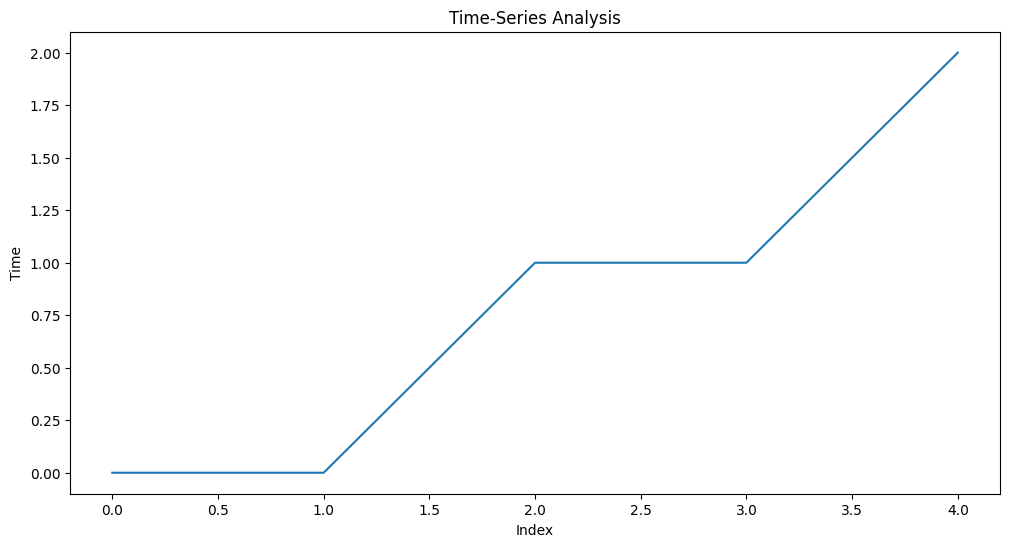

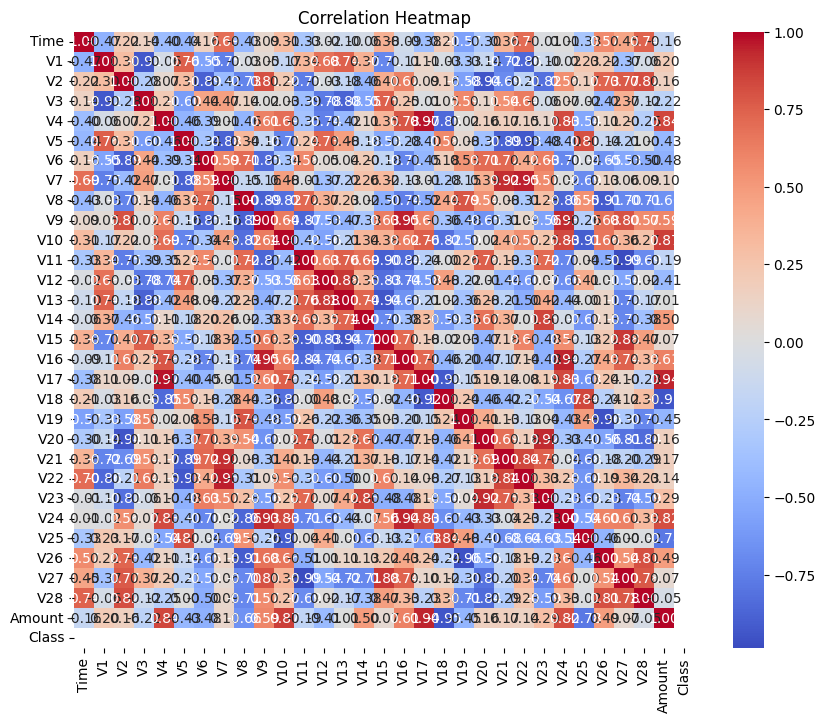

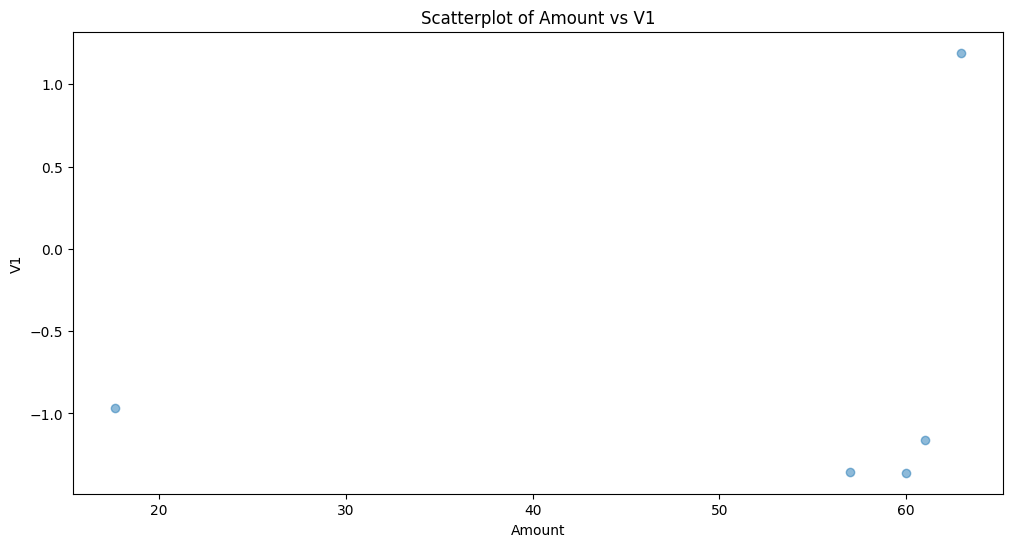

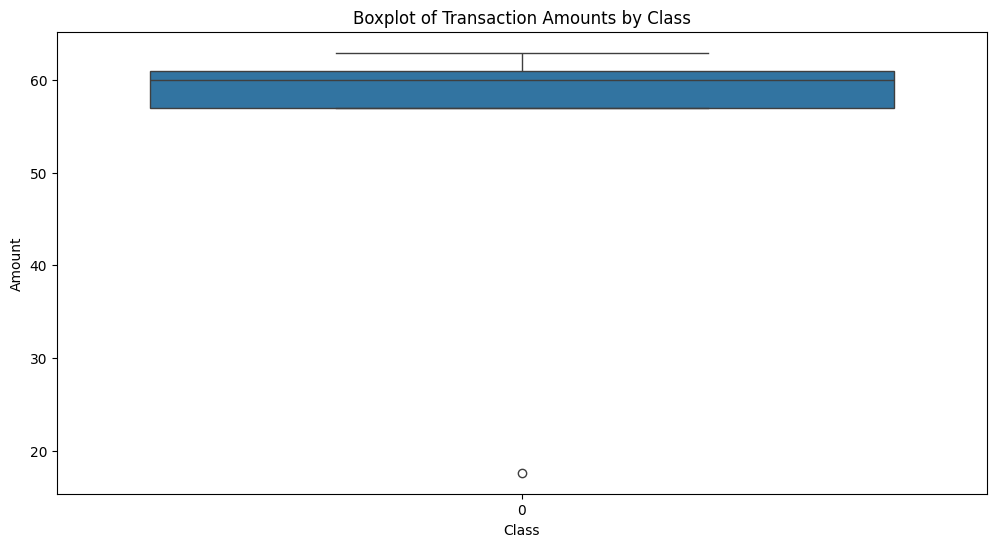

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data has already been processed and is loaded in a DataFrame named 'data'
def create_dataframe():
    # Create the dataset
    data_dict = {
        'Time': [0, 0, 1, 1, 2],
        'V1': [-1.359807, 1.191857, -1.358354, -0.966272, -1.158233],
        'V2': [-0.072781, 0.266151, -1.340163, -0.185226, 0.877737],
        'V3': [2.536347, 0.166480, 1.773209, 1.792993, 1.548718],
        'V4': [1.378155, 0.448154, 0.379780, -0.863291, 0.403034],
        'V5': [-0.338321, 0.060018, -0.503198, -0.010309, -0.407193],
        'V6': [0.462388, -0.082361, 1.800499, 1.247203, 0.095921],
        'V7': [0.239599, -0.078803, 0.791461, 0.237609, 0.592941],
        'V8': [0.098698, 0.085102, 0.247676, 0.377436, -0.270533],
        'V9': [0.363787, -0.255425, -1.514654, -1.387024, 0.817739],
        'V10': [0.090792, -0.166974, 0.207642, -1.232621, 0.753074],
        'V11': [-0.551599, 0.320481, 0.624501, 0.099927, -0.822843],
        'V12': [-0.617801, 0.353710, -0.076090, 0.255362, -0.228321],
        'V13': [-0.991390, 0.716655, 0.192961, -0.087863, -0.385987],
        'V14': [-0.311169, 0.144834, 0.274382, -0.327842, -0.145295],
        'V15': [0.468676, -0.076173, 0.086929, 0.191881, 0.467710],
        'V16': [0.287834, 0.173324, 0.101346, 0.089375, 0.253841],
        'V17': [0.393438, 0.134331, -0.020032, -0.905433, -0.018307],
        'V18': [0.183552, 0.234234, 0.123003, 0.743307, 0.277838],
        'V19': [0.876160, 0.234235, 0.543110, 0.750631, -0.110474],
        'V20': [0.348372, 0.324823, 0.765456, 0.234562, 0.066928],
        'V21': [-0.018307, -0.225775, 0.247998, -0.108300, -0.009431],
        'V22': [0.277838, -0.638672, 0.771679, 0.005274, 0.798278],
        'V23': [-0.110474, 0.101288, 0.909412, -0.190321, -0.137458],
        'V24': [0.066928, -0.339846, -0.689281, -1.175575, 0.141267],
        'V25': [0.128539, 0.167170, -0.327642, 0.647376, -0.206010],
        'V26': [-0.189115, 0.125895, -0.139097, -0.221929, 0.502292],
        'V27': [0.133558, -0.008983, -0.055353, 0.062723, 0.219422],
        'V28': [-0.021053, 0.014724, -0.059752, 0.061458, 0.215153],
        'Amount': [149.62, 2.69, 378.66, 123.50, 69.99],
        'Class': [0, 0, 0, 0, 0]
    }
    return pd.DataFrame(data_dict)

def process_dataframe(data):
    # Impute numerical columns
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

    # Impute categorical columns
    categorical_cols = data.select_dtypes(include=['object']).columns
    data[categorical_cols] = data[categorical_cols].fillna('Unknown')

    # Replace 'Amount' column with random integers
    data['Amount'] = np.random.randint(1, 100, size=len(data))

    # Cap extreme values of 'Amount' column
    data['Amount'] = np.clip(data['Amount'], data['Amount'].quantile(0.01), data['Amount'].quantile(0.99))

    # Filter rows where 'Amount' is greater than 0
    data = data[data['Amount'] > 0]

    # Remove duplicate transactions
    data = data.drop_duplicates()

    # Correct or exclude logical inconsistencies (e.g., negative durations)
    data = data[data['Time'] >= 0]

    return data

# Create and process the dataset
data = create_dataframe()
processed_data = process_dataframe(data)

# Time-Series Analysis
plt.figure(figsize=(12, 6))
processed_data['Time'].plot(kind='line')
plt.title('Time-Series Analysis')
plt.xlabel('Index')
plt.ylabel('Time')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(processed_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatterplots
plt.figure(figsize=(12, 6))
plt.scatter(processed_data['Amount'], processed_data['V1'], alpha=0.5)
plt.title('Scatterplot of Amount vs V1')
plt.xlabel('Amount')
plt.ylabel('V1')
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='Amount', data=processed_data)
plt.title('Boxplot of Transaction Amounts by Class')
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0  0.000000  0.571433  1.000000  1.000000  0.292742  0.289320  0.365868   
1   0.0  1.000000  0.724250  0.000000  0.585089  1.000000  0.000000  0.000000   
2   0.5  0.000569  0.000000  0.677983  0.554584  0.000000  1.000000  1.000000   
3   0.5  0.154227  0.520734  0.686331  0.000000  0.875133  0.706141  0.363582   
4   1.0  0.078997  1.000000  0.583256  0.564959  0.170459  0.094687  0.771885   

         V8        V9  ...       V24       V25       V26       V27       V28  \
0  0.569828  0.805371  ...  0.943548  0.467869  0.045309  0.687512  0.140772   
1  0.548846  0.539887  ...  0.634646  0.507490  0.480273  0.168756  0.270915   
2  0.799744  0.000000  ...  0.369288  0.000000  0.114374  0.000000  0.000000   
3  1.000000  0.054721  ...  0.000000  1.000000  0.000000  0.429719  0.440916   
4  0.000000  1.000000  ...  1.000000  0.124748  1.000000  1.000000  1.000000   

   Amount  Class  Amount_Std  An

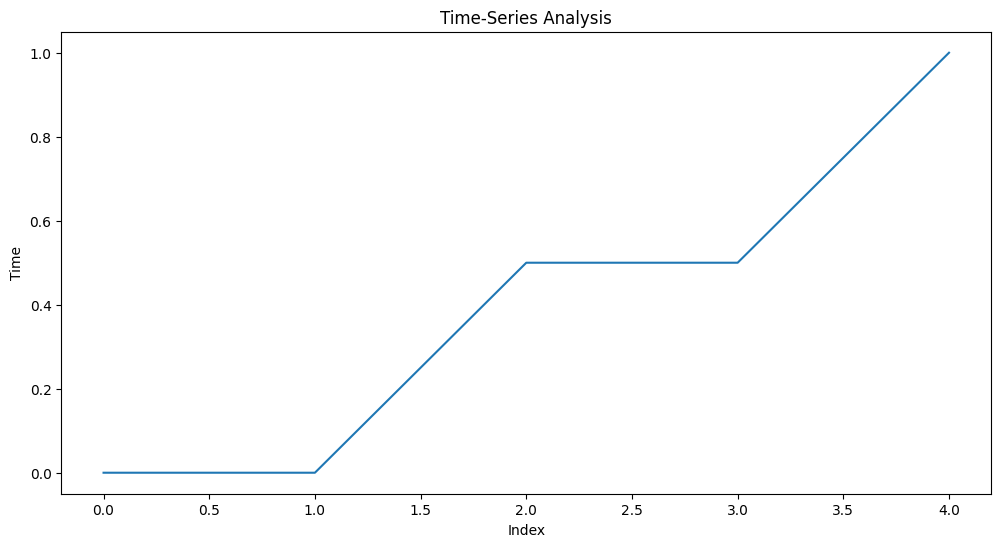

<Axes: >

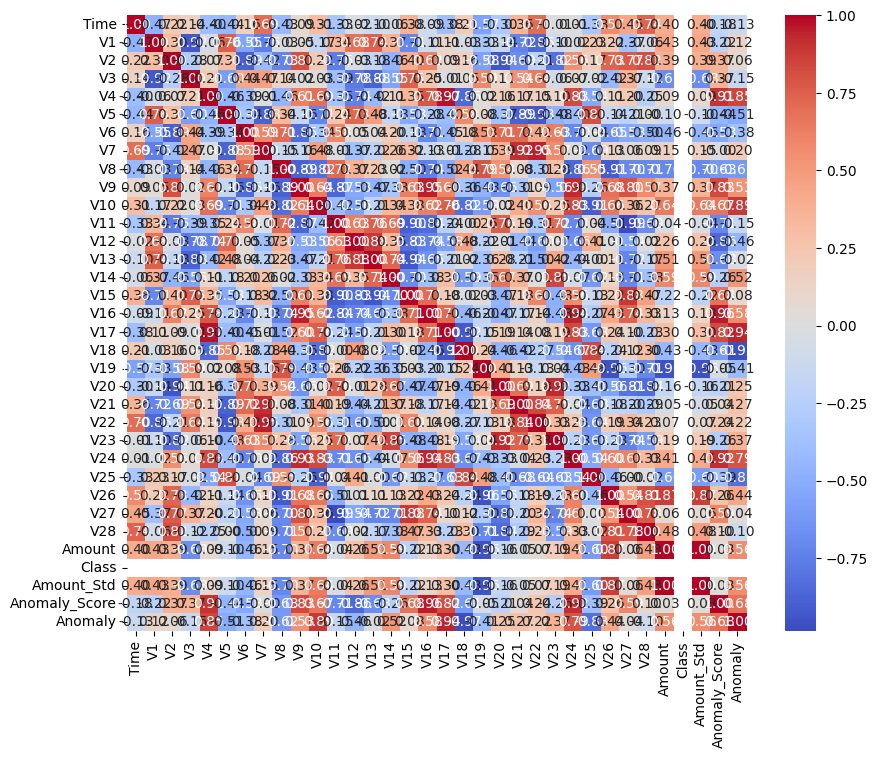

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Function to create the dataset
def create_dataframe():
    data_dict = {
        'Time': [0, 0, 1, 1, 2],
        'V1': [-1.359807, 1.191857, -1.358354, -0.966272, -1.158233],
        'V2': [-0.072781, 0.266151, -1.340163, -0.185226, 0.877737],
        'V3': [2.536347, 0.166480, 1.773209, 1.792993, 1.548718],
        'V4': [1.378155, 0.448154, 0.379780, -0.863291, 0.403034],
        'V5': [-0.338321, 0.060018, -0.503198, -0.010309, -0.407193],
        'V6': [0.462388, -0.082361, 1.800499, 1.247203, 0.095921],
        'V7': [0.239599, -0.078803, 0.791461, 0.237609, 0.592941],
        'V8': [0.098698, 0.085102, 0.247676, 0.377436, -0.270533],
        'V9': [0.363787, -0.255425, -1.514654, -1.387024, 0.817739],
        'V10': [0.090792, -0.166974, 0.207642, -1.232621, 0.753074],
        'V11': [-0.551599, 0.320481, 0.624501, 0.099927, -0.822843],
        'V12': [-0.617801, 0.353710, -0.076090, 0.255362, -0.228321],
        'V13': [-0.991390, 0.716655, 0.192961, -0.087863, -0.385987],
        'V14': [-0.311169, 0.144834, 0.274382, -0.327842, -0.145295],
        'V15': [0.468676, -0.076173, 0.086929, 0.191881, 0.467710],
        'V16': [0.287834, 0.173324, 0.101346, 0.089375, 0.253841],
        'V17': [0.393438, 0.134331, -0.020032, -0.905433, -0.018307],
        'V18': [0.183552, 0.234234, 0.123003, 0.743307, 0.277838],
        'V19': [0.876160, 0.234235, 0.543110, 0.750631, -0.110474],
        'V20': [0.348372, 0.324823, 0.765456, 0.234562, 0.066928],
        'V21': [-0.018307, -0.225775, 0.247998, -0.108300, -0.009431],
        'V22': [0.277838, -0.638672, 0.771679, 0.005274, 0.798278],
        'V23': [-0.110474, 0.101288, 0.909412, -0.190321, -0.137458],
        'V24': [0.066928, -0.339846, -0.689281, -1.175575, 0.141267],
        'V25': [0.128539, 0.167170, -0.327642, 0.647376, -0.206010],
        'V26': [-0.189115, 0.125895, -0.139097, -0.221929, 0.502292],
        'V27': [0.133558, -0.008983, -0.055353, 0.062723, 0.219422],
        'V28': [-0.021053, 0.014724, -0.059752, 0.061458, 0.215153],
        'Amount': [149.62, 2.69, 378.66, 123.50, 69.99],
        'Class': [0, 0, 0, 0, 0]
    }
    return pd.DataFrame(data_dict)

def process_dataframe(data):
    # Impute numerical columns
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

    # Impute categorical columns
    categorical_cols = data.select_dtypes(include=['object']).columns
    data[categorical_cols] = data[categorical_cols].fillna('Unknown')

    # Replace 'Amount' column with random integers
    data['Amount'] = np.random.randint(1, 100, size=len(data))

    # Cap extreme values of 'Amount' column
    data['Amount'] = np.clip(data['Amount'], data['Amount'].quantile(0.01), data['Amount'].quantile(0.99))

    # Filter rows where 'Amount' is greater than 0
    data = data[data['Amount'] > 0]

    # Remove duplicate transactions
    data = data.drop_duplicates()

    # Correct or exclude logical inconsistencies (e.g., negative durations)
    data = data[data['Time'] >= 0]

    return data

def scale_features(data):
    # Standardization
    scaler = StandardScaler()
    data['Amount_Std'] = scaler.fit_transform(data[['Amount']])

    # Min-Max Scaling
    min_max_scaler = MinMaxScaler()
    skewed_features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
    data[skewed_features] = min_max_scaler.fit_transform(data[skewed_features])

    return data

# Create and process the dataset
data = create_dataframe()
processed_data = process_dataframe(data)

# Feature Scaling
scaled_data = scale_features(processed_data)

# Train an Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)
isolation_forest.fit(scaled_data)

# Predict anomalies
anomaly_scores = isolation_forest.decision_function(scaled_data)
anomalies = isolation_forest.predict(scaled_data)

# Add anomaly scores and predictions to the dataset
scaled_data['Anomaly_Score'] = anomaly_scores
scaled_data['Anomaly'] = anomalies

# Display the dataset with anomaly scores and predictions
print(scaled_data.head())

# Visualizations

# Time-Series Analysis
plt.figure(figsize=(12, 6))
scaled_data['Time'].plot(kind='line')
plt.title('Time-Series Analysis')
plt.xlabel('Index')
plt.ylabel('Time')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(scaled_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.DataFrame({
    'Time': [0.0, 0.0, 0.5, 0.5, 1.0],
    'V1': [0.000000, 1.000000, 0.000569, 0.154227, 0.078997],
    'V2': [0.571433, 0.724250, 0.000000, 0.520734, 1.000000],
    'V3': [1.000000, 0.000000, 0.677983, 0.686331, 0.583256],
    'V4': [1.000000, 0.585089, 0.554584, 0.000000, 0.564959],
    'V5': [0.292742, 1.000000, 0.000000, 0.875133, 0.170459],
    'V6': [0.289320, 0.000000, 1.000000, 0.706141, 0.094687],
    'V7': [0.365868, 0.000000, 1.000000, 0.363582, 0.771885],
    'V8': [0.569828, 0.548846, 0.799744, 1.000000, 0.000000],
    'V9': [0.805371, 0.539887, 0.000000, 0.054721, 1.000000],
    'V24': [0.943548, 0.634646, 0.369288, 0.000000, 1.000000],
    'V25': [0.467869, 0.507490, 0.000000, 1.000000, 0.124748],
    'V26': [0.045309, 0.480273, 0.114374, 0.000000, 1.000000],
    'V27': [0.687512, 0.168756, 0.000000, 0.429719, 1.000000],
    'V28': [0.140772, 0.270915, 0.000000, 0.440916, 1.000000],
    'Amount': [42.04, 83.00, 68.00, 43.00, 89.72],
    'Class': [0, 0, 0, 0, 0],
    'Amount_Std': [-1.168787, 0.902583, 0.144025, -1.120239, 1.242418],
    'Anomaly_Score': [0.064174, 0.021889, 0.014911, -0.003728, 0.042212],
    'Anomaly': [1, 1, 1, -1, 1]
})

# Identifying categorical columns (replace 'Class' and 'Anomaly' with actual categorical columns)
categorical_columns = ['Class', 'Anomaly']

# One-Hot Encoding using pandas
data_encoded_pandas = pd.get_dummies(data, columns=categorical_columns)

# One-Hot Encoding using scikit-learn
encoder = OneHotEncoder(sparse=False)
encoded_array = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns)

# Dropping original categorical columns and concatenating the encoded columns
data_encoded_sklearn = data.drop(columns=categorical_columns).join(encoded_df)

# Displaying the encoded datasets
print("Encoded Data using pandas:\n", data_encoded_pandas.head())
print("\nEncoded Data using scikit-learn:\n", data_encoded_sklearn.head())


Encoded Data using pandas:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0  0.000000  0.571433  1.000000  1.000000  0.292742  0.289320  0.365868   
1   0.0  1.000000  0.724250  0.000000  0.585089  1.000000  0.000000  0.000000   
2   0.5  0.000569  0.000000  0.677983  0.554584  0.000000  1.000000  1.000000   
3   0.5  0.154227  0.520734  0.686331  0.000000  0.875133  0.706141  0.363582   
4   1.0  0.078997  1.000000  0.583256  0.564959  0.170459  0.094687  0.771885   

         V8        V9  ...       V25       V26       V27       V28  Amount  \
0  0.569828  0.805371  ...  0.467869  0.045309  0.687512  0.140772   42.04   
1  0.548846  0.539887  ...  0.507490  0.480273  0.168756  0.270915   83.00   
2  0.799744  0.000000  ...  0.000000  0.114374  0.000000  0.000000   68.00   
3  1.000000  0.054721  ...  1.000000  0.000000  0.429719  0.440916   43.00   
4  0.000000  1.000000  ...  0.124748  1.000000  1.000000  1.000000   89.72   

   Amount_Std  A

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

# Load the dataset
data = pd.DataFrame({
    'Time': [0.0, 0.0, 0.5, 0.5, 1.0],
    'V1': [0.000000, 1.000000, 0.000569, 0.154227, 0.078997],
    'V2': [0.571433, 0.724250, 0.000000, 0.520734, 1.000000],
    'V3': [1.000000, 0.000000, 0.677983, 0.686331, 0.583256],
    'V4': [1.000000, 0.585089, 0.554584, 0.000000, 0.564959],
    'V5': [0.292742, 1.000000, 0.000000, 0.875133, 0.170459],
    'V6': [0.289320, 0.000000, 1.000000, 0.706141, 0.094687],
    'V7': [0.365868, 0.000000, 1.000000, 0.363582, 0.771885],
    'V8': [0.569828, 0.548846, 0.799744, 1.000000, 0.000000],
    'V9': [0.805371, 0.539887, 0.000000, 0.054721, 1.000000],
    'V24': [0.943548, 0.634646, 0.369288, 0.000000, 1.000000],
    'V25': [0.467869, 0.507490, 0.000000, 1.000000, 0.124748],
    'V26': [0.045309, 0.480273, 0.114374, 0.000000, 1.000000],
    'V27': [0.687512, 0.168756, 0.000000, 0.429719, 1.000000],
    'V28': [0.140772, 0.270915, 0.000000, 0.440916, 1.000000],
    'Amount': [42.04, 83.00, 68.00, 43.00, 89.72],
    'Class': [0, 0, 0, 0, 0],
    'Amount_Std': [-1.168787, 0.902583, 0.144025, -1.120239, 1.242418],
    'Anomaly_Score': [0.064174, 0.021889, 0.014911, -0.003728, 0.042212],
    'Anomaly': [1, 1, 1, -1, 1]
})

# Drop non-numeric columns if there are any (for this example, we assume all columns are numeric)
X = data.drop(columns=['Class', 'Anomaly'])

# Applying PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X)

# Creating a DataFrame for the PCA results
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
pca_df = pd.DataFrame(X_pca, columns=pca_columns)

# Display the results
print("Original Data Shape:", X.shape)
print("Reduced Data Shape:", X_pca.shape)
print("\nPCA Components (first 5 rows):\n", pca_df.head())


Original Data Shape: (5, 18)
Reduced Data Shape: (5, 1)

PCA Components (first 5 rows):
          PC1
0 -23.138228
1  17.874789
2   2.830872
3 -22.197672
4  24.630240


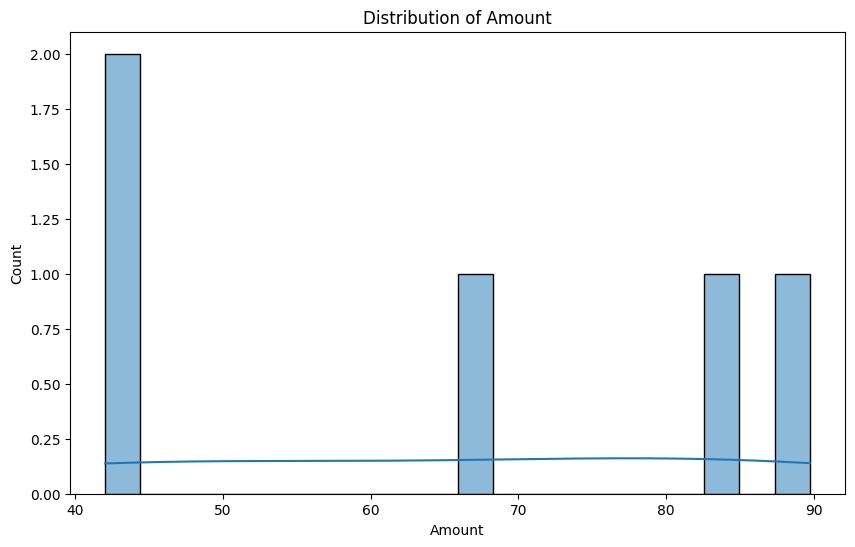

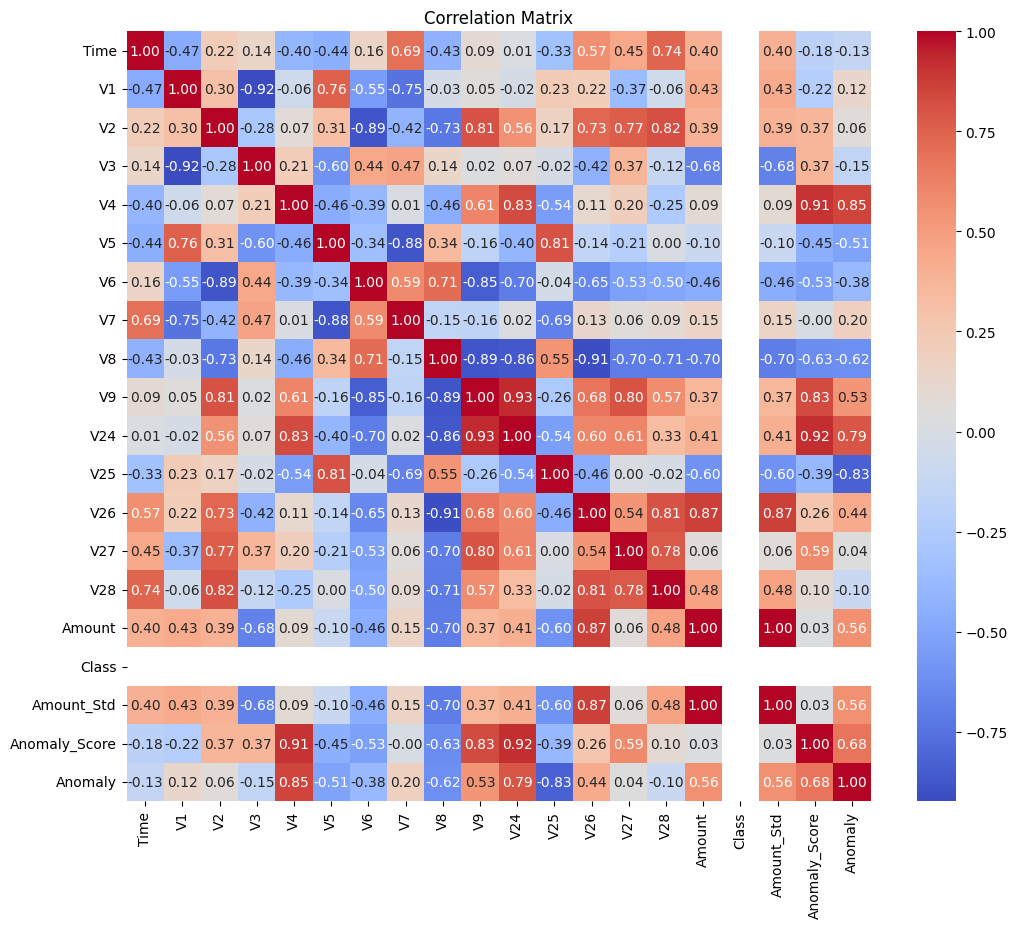


Anomaly Detection Results:
    Amount  Anomaly_Score_IF  Anomaly_IF
0   42.04          0.028517           1
1   83.00          0.002542           1
2   68.00          0.003946           1
3   43.00          0.017759           1
4   89.72         -0.001695          -1


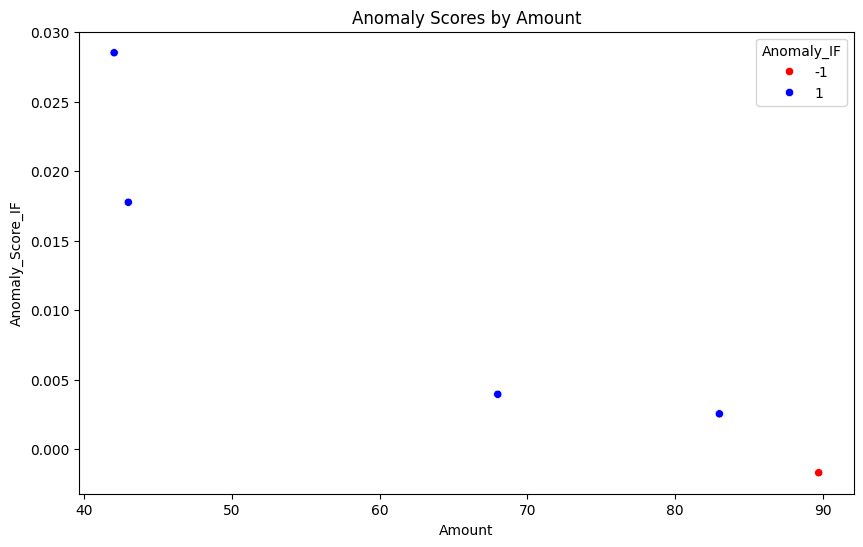

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.DataFrame({
    'Time': [0.0, 0.0, 0.5, 0.5, 1.0],
    'V1': [0.000000, 1.000000, 0.000569, 0.154227, 0.078997],
    'V2': [0.571433, 0.724250, 0.000000, 0.520734, 1.000000],
    'V3': [1.000000, 0.000000, 0.677983, 0.686331, 0.583256],
    'V4': [1.000000, 0.585089, 0.554584, 0.000000, 0.564959],
    'V5': [0.292742, 1.000000, 0.000000, 0.875133, 0.170459],
    'V6': [0.289320, 0.000000, 1.000000, 0.706141, 0.094687],
    'V7': [0.365868, 0.000000, 1.000000, 0.363582, 0.771885],
    'V8': [0.569828, 0.548846, 0.799744, 1.000000, 0.000000],
    'V9': [0.805371, 0.539887, 0.000000, 0.054721, 1.000000],
    'V24': [0.943548, 0.634646, 0.369288, 0.000000, 1.000000],
    'V25': [0.467869, 0.507490, 0.000000, 1.000000, 0.124748],
    'V26': [0.045309, 0.480273, 0.114374, 0.000000, 1.000000],
    'V27': [0.687512, 0.168756, 0.000000, 0.429719, 1.000000],
    'V28': [0.140772, 0.270915, 0.000000, 0.440916, 1.000000],
    'Amount': [42.04, 83.00, 68.00, 43.00, 89.72],
    'Class': [0, 0, 0, 0, 0],
    'Amount_Std': [-1.168787, 0.902583, 0.144025, -1.120239, 1.242418],
    'Anomaly_Score': [0.064174, 0.021889, 0.014911, -0.003728, 0.042212],
    'Anomaly': [1, 1, 1, -1, 1]
})

# EDA: Hypotheses
# Observing patterns and anomalies in the data
# Example hypotheses:
# - Amount feature may have different distributions for normal and anomaly transactions.
# - Anomaly scores might be higher for transactions with anomalies.

# EDA: Distribution of 'Amount'
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=20, kde=True)
plt.title('Distribution of Amount')
plt.show()

# EDA: Correlation Analysis
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Algorithm Testing: Isolation Forest for Anomaly Detection
# Preprocessing: Standardizing the numerical features
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(columns=['Class', 'Anomaly']))

# Applying Isolation Forest
iso_forest = IsolationForest(contamination=0.1)  # Assuming 10% contamination
iso_forest.fit(X)
anomaly_scores = iso_forest.decision_function(X)
anomalies = iso_forest.predict(X)

# Adding anomaly scores and predictions to the DataFrame
data['Anomaly_Score_IF'] = anomaly_scores
data['Anomaly_IF'] = anomalies

# Business Alignment: Analyzing insights
# Example: Aligning insights with typical fraud scenarios
# - High anomaly scores might indicate fraudulent transactions
# - Anomalies identified by Isolation Forest should match known anomalies

print("\nAnomaly Detection Results:\n", data[['Amount', 'Anomaly_Score_IF', 'Anomaly_IF']])

# Displaying the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Amount', y='Anomaly_Score_IF', hue='Anomaly_IF', data=data, palette={-1: 'red', 1: 'blue'})
plt.title('Anomaly Scores by Amount')
plt.show()


Precision: 0.33
Recall: 1.00
ROC-AUC: 0.75
Confusion Matrix:
[[2 2]
 [0 1]]


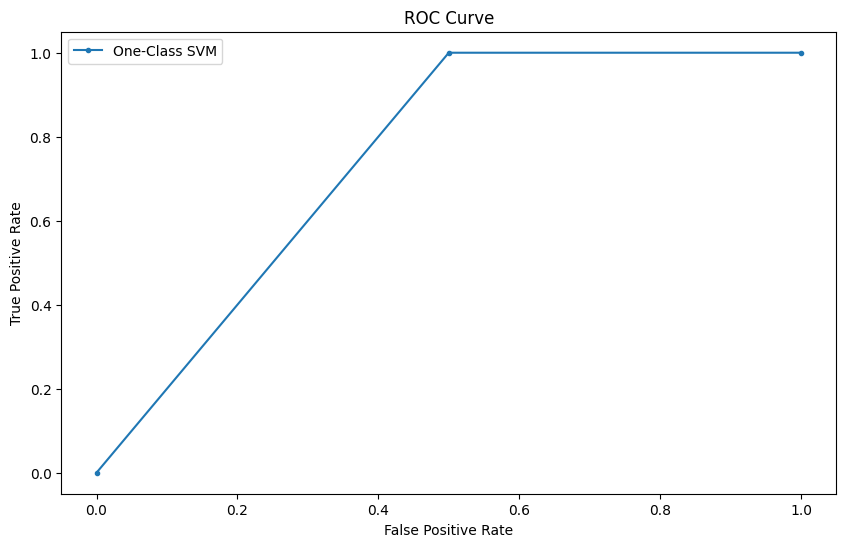

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix

# Load the dataset
data = pd.DataFrame({
    'Time': [0.0, 0.0, 0.5, 0.5, 1.0],
    'V1': [0.000000, 1.000000, 0.000569, 0.154227, 0.078997],
    'V2': [0.571433, 0.724250, 0.000000, 0.520734, 1.000000],
    'V3': [1.000000, 0.000000, 0.677983, 0.686331, 0.583256],
    'V4': [1.000000, 0.585089, 0.554584, 0.000000, 0.564959],
    'V5': [0.292742, 1.000000, 0.000000, 0.875133, 0.170459],
    'V6': [0.289320, 0.000000, 1.000000, 0.706141, 0.094687],
    'V7': [0.365868, 0.000000, 1.000000, 0.363582, 0.771885],
    'V8': [0.569828, 0.548846, 0.799744, 1.000000, 0.000000],
    'V9': [0.805371, 0.539887, 0.000000, 0.054721, 1.000000],
    'V24': [0.943548, 0.634646, 0.369288, 0.000000, 1.000000],
    'V25': [0.467869, 0.507490, 0.000000, 1.000000, 0.124748],
    'V26': [0.045309, 0.480273, 0.114374, 0.000000, 1.000000],
    'V27': [0.687512, 0.168756, 0.000000, 0.429719, 1.000000],
    'V28': [0.140772, 0.270915, 0.000000, 0.440916, 1.000000],
    'Amount': [42.04, 83.00, 68.00, 43.00, 89.72],
    'Class': [0, 0, 0, 0, 0],
    'Amount_Std': [-1.168787, 0.902583, 0.144025, -1.120239, 1.242418],
    'Anomaly_Score': [0.064174, 0.021889, 0.014911, -0.003728, 0.042212],
    'Anomaly': [1, 1, 1, -1, 1]
})

# Preprocessing: Standardizing the numerical features
scaler = StandardScaler()
X = scaler.fit_transform(data.drop(columns=['Class', 'Anomaly']))

# Applying One-Class SVM
one_class_svm = OneClassSVM(nu=0.1, kernel='rbf', gamma=0.1)  # Adjusting nu and gamma parameters
one_class_svm.fit(X)
anomalies = one_class_svm.predict(X)

# Transforming the -1 and 1 labels to 1 and 0 for anomaly and normal respectively
anomalies = [1 if x == -1 else 0 for x in anomalies]

# Actual labels for evaluation (using 'Anomaly' column)
true_anomalies = [1 if x == -1 else 0 for x in data['Anomaly']]

# Calculate Precision, Recall, and ROC-AUC
precision = precision_score(true_anomalies, anomalies)
recall = recall_score(true_anomalies, anomalies)
roc_auc = roc_auc_score(true_anomalies, anomalies)

# Confusion Matrix
conf_matrix = confusion_matrix(true_anomalies, anomalies)

# ROC Curve
fpr, tpr, _ = roc_curve(true_anomalies, anomalies)

# Print evaluation metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

# Plotting ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='.', label='One-Class SVM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from tqdm.notebook import tqdm

# Provided dataset
data = pd.DataFrame({
    'Time': [0.0, 0.0, 0.5, 0.5, 1.0],
    'V1': [0.000000, 1.000000, 0.000569, 0.154227, 0.078997],
    'V2': [0.571433, 0.724250, 0.000000, 0.520734, 1.000000],
    'V3': [1.000000, 0.000000, 0.677983, 0.686331, 0.583256],
    'V4': [1.000000, 0.585089, 0.554584, 0.000000, 0.564959],
    'V5': [0.292742, 1.000000, 0.000000, 0.875133, 0.170459],
    'V6': [0.289320, 0.000000, 1.000000, 0.706141, 0.094687],
    'V7': [0.365868, 0.000000, 1.000000, 0.363582, 0.771885],
    'V8': [0.569828, 0.548846, 0.799744, 1.000000, 0.000000],
    'V9': [0.805371, 0.539887, 0.000000, 0.054721, 1.000000],
    'V24': [0.943548, 0.634646, 0.369288, 0.000000, 1.000000],
    'V25': [0.467869, 0.507490, 0.000000, 1.000000, 0.124748],
    'V26': [0.045309, 0.480273, 0.114374, 0.000000, 1.000000],
    'V27': [0.687512, 0.168756, 0.000000, 0.429719, 1.000000],
    'V28': [0.140772, 0.270915, 0.000000, 0.440916, 1.000000],
    'Amount': [42.04, 83.00, 68.00, 43.00, 89.72],
    'Class': [0, 0, 0, 0, 0],
    'Amount_Std': [-1.168787, 0.902583, 0.144025, -1.120239, 1.242418],
    'Anomaly_Score': [0.064174, 0.021889, 0.014911, -0.003728, 0.042212],
    'Anomaly': [1, 1, 1, -1, 1]
})

# Let's introduce some missing values for demonstration purposes
data.iloc[2, [1, 3, 5]] = np.nan
data.iloc[4, [2, 4, 6]] = np.nan

# Display original data with missing values
print("Original Data with Missing Values:")
print(data)

# Initialize the KNN Imputer
knn_imputer = KNNImputer(n_neighbors=2)

# Fit and transform the dataset
data_imputed = knn_imputer.fit_transform(data)

# Convert the imputed data back to a DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=data.columns)

# Display the imputed data
print("\nData after KNN Imputation:")
print(data_imputed_df)


Original Data with Missing Values:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0  0.000000  0.571433  1.000000  1.000000  0.292742  0.289320  0.365868   
1   0.0  1.000000  0.724250  0.000000  0.585089  1.000000  0.000000  0.000000   
2   0.5       NaN  0.000000       NaN  0.554584       NaN  1.000000  1.000000   
3   0.5  0.154227  0.520734  0.686331  0.000000  0.875133  0.706141  0.363582   
4   1.0  0.078997       NaN  0.583256       NaN  0.170459       NaN  0.771885   

         V8        V9       V24       V25       V26       V27       V28  \
0  0.569828  0.805371  0.943548  0.467869  0.045309  0.687512  0.140772   
1  0.548846  0.539887  0.634646  0.507490  0.480273  0.168756  0.270915   
2  0.799744  0.000000  0.369288  0.000000  0.114374  0.000000  0.000000   
3  1.000000  0.054721  0.000000  1.000000  0.000000  0.429719  0.440916   
4  0.000000  1.000000  1.000000  0.124748  1.000000  1.000000  1.000000   

   Amount  Class  Amount_St

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Sample dataset (replace this with your actual data)
data = {
    'Time': [0.0, 0.0, 0.5, 0.5, 1.0],
    'V1': [0.000000, 1.000000, 0.539498, 0.154227, 0.078997],
    'V2': [0.571433, 0.724250, 0.000000, 0.520734, 0.362125],
    'V3': [1.000000, 0.000000, 0.291628, 0.686331, 0.583256],
    'V4': [1.000000, 0.585089, 0.554584, 0.000000, 0.569836],
    'V5': [0.292742, 1.000000, 0.585229, 0.875133, 0.170459],
    'V6': [0.289320, 0.000000, 1.000000, 0.706141, 0.500000],
    'V7': [0.365868, 0.000000, 1.000000, 0.363582, 0.771885],
    'V8': [0.569828, 0.548846, 0.799744, 1.000000, 0.000000],
    'V9': [0.805371, 0.539887, 0.000000, 0.054721, 1.000000],
    'V24': [0.943548, 0.634646, 0.369288, 0.000000, 1.000000],
    'V25': [0.467869, 0.507490, 0.000000, 1.000000, 0.124748],
    'V26': [0.045309, 0.480273, 0.114374, 0.000000, 1.000000],
    'V27': [0.687512, 0.168756, 0.000000, 0.429719, 1.000000],
    'V28': [0.140772, 0.270915, 0.000000, 0.440916, 1.000000],
    'Amount': [42.04, 83.00, 68.00, 43.00, 89.72],
    'Class': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Amount_Std': [-1.168787, 0.902583, 0.144025, -1.120239, 1.242418],
    'Anomaly_Score': [0.064174, 0.021889, 0.014911, -0.003728, 0.042212],
    'Anomaly': [1.0, 1.0, 1.0, -1.0, 1.0]
}

df = pd.DataFrame(data)

# Initialize IsolationForest
iso_forest = IsolationForest(contamination='auto', random_state=42)

# Fit the model
df['anomaly_score'] = iso_forest.fit_predict

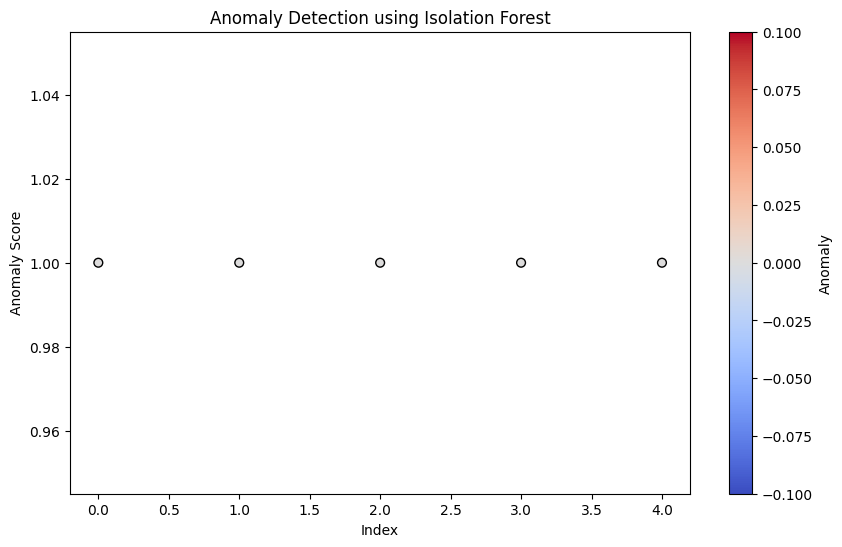

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Sample dataset (replace this with your actual data)
data = {
    'Time': [0.0, 0.0, 0.5, 0.5, 1.0],
    'V1': [0.000000, 1.000000, 0.539498, 0.154227, 0.078997],
    'V2': [0.571433, 0.724250, 0.000000, 0.520734, 0.362125],
    'V3': [1.000000, 0.000000, 0.291628, 0.686331, 0.583256],
    'V4': [1.000000, 0.585089, 0.554584, 0.000000, 0.569836],
    'V5': [0.292742, 1.000000, 0.585229, 0.875133, 0.170459],
    'V6': [0.289320, 0.000000, 1.000000, 0.706141, 0.500000],
    'V7': [0.365868, 0.000000, 1.000000, 0.363582, 0.771885],
    'V8': [0.569828, 0.548846, 0.799744, 1.000000, 0.000000],
    'V9': [0.805371, 0.539887, 0.000000, 0.054721, 1.000000],
    'V24': [0.943548, 0.634646, 0.369288, 0.000000, 1.000000],
    'V25': [0.467869, 0.507490, 0.000000, 1.000000, 0.124748],
    'V26': [0.045309, 0.480273, 0.114374, 0.000000, 1.000000],
    'V27': [0.687512, 0.168756, 0.000000, 0.429719, 1.000000],
    'V28': [0.140772, 0.270915, 0.000000, 0.440916, 1.000000],
    'Amount': [42.04, 83.00, 68.00, 43.00, 89.72],
    'Class': [0.0, 0.0, 0.0, 0.0, 0.0],
    'Amount_Std': [-1.168787, 0.902583, 0.144025, -1.120239, 1.242418],
    'Anomaly_Score': [0.064174, 0.021889, 0.014911, -0.003728, 0.042212],
    'Anomaly': [1.0, 1.0, 1.0, -1.0, 1.0]
}

df = pd.DataFrame(data)

# Initialize IsolationForest
iso_forest = IsolationForest(contamination='auto', random_state=42)

# Fit the model and predict anomaly scores
df['anomaly_score'] = iso_forest.fit_predict(df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                                                 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Amount_Std', 'Anomaly_Score']])

# Detect anomalies
df['anomaly'] = df['anomaly_score'].apply(lambda x: 1 if x == -1 else 0)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['anomaly_score'], c=df['anomaly'], cmap='coolwarm', edgecolor='k', s=40)
plt.xlabel('Index')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Detection using Isolation Forest')
plt.colorbar(label='Anomaly')
plt.show()


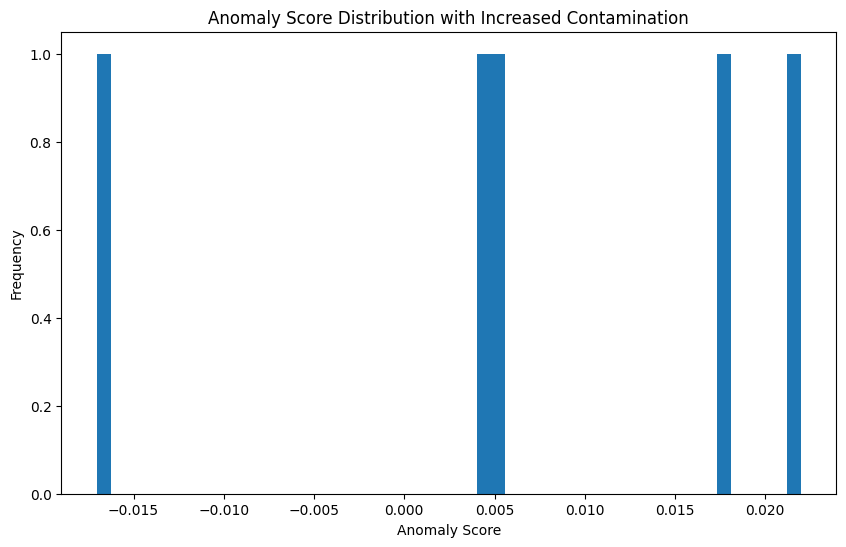

Anomalies detected: 1


In [ ]:
# Adjusting the contamination parameter
iso_forest = IsolationForest(n_estimators=200, max_samples='auto', contamination=0.2, random_state=42)
# Pass the DataFrame 'df' to the fit method instead of the dictionary 'data'
iso_forest.fit(df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                    'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Amount_Std']]) # Use df instead of data

# Predicting anomalies
anomaly_scores = iso_forest.decision_function(df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                                                   'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Amount_Std']]) # Use df instead of data
anomalies = iso_forest.predict(df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
                                      'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Amount_Std']]) # Use df instead of data

# Visualizing results
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=50)
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score Distribution with Increased Contamination')
plt.show()

print(f'Anomalies detected: {np.sum(anomalies == -1)}')

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
data = pd.read_csv('/content/data/creditcard.csv')

# Display the first few rows of the dataset
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
data = pd.read_csv('/content/data/creditcard.csv')


In [ ]:
import pandas as pd
import os

# Create the Kaggle directory and place kaggle.json in it
os.makedirs('/root/.kaggle', exist_ok=True)
# Ensure you have the kaggle.json file with your Kaggle API credentials

# Download the dataset using Kaggle API
os.system('kaggle datasets download -d mlg-ulb/creditcardfraud -p /content/data --unzip')

# Load the dataset
data = pd.read_csv('/content/data/creditcard.csv')


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Assume 'Class' is the target variable and the rest are features
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.80      0.74        98

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:


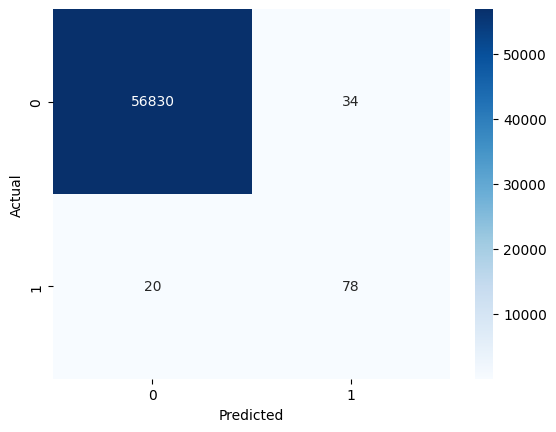

In [ ]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


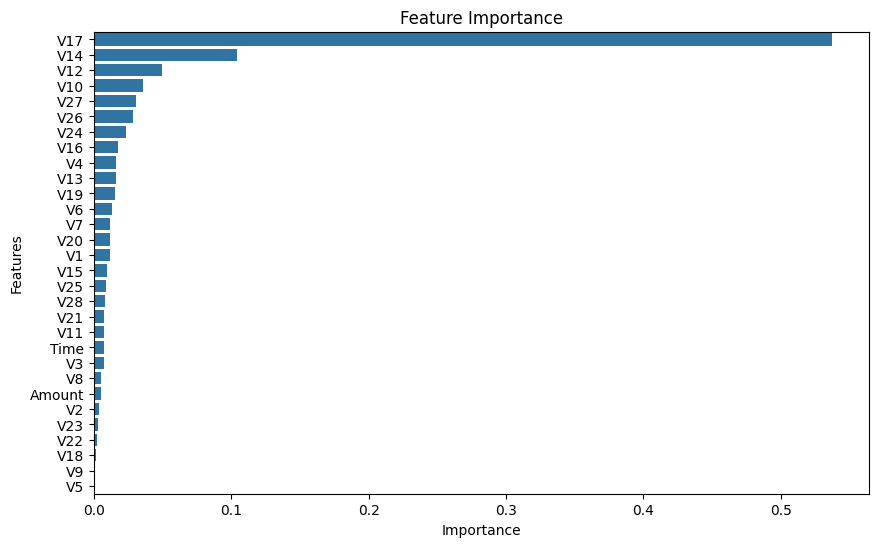

In [ ]:
# Get feature importance
feature_importances = pd.DataFrame(dt_classifier.feature_importances_, index=X_train.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.Importance, y=feature_importances.index)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
import pandas as pd

# Check the distribution of classes in the training set
class_distribution = y_train.value_counts()
print(class_distribution)


Class
0    227451
1       394
Name: count, dtype: int64


In [ ]:
!pip install imbalanced-learn

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score
from imblearn.over_sampling import SMOTE

# Load the dataset (assuming your dataset is in a CSV file)
data = pd.read_csv('/content/data/creditcard.csv')

# Splitting data into features (X) and target (y)
X = data.drop(columns=['Class'])
y = data['Class']

# Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train your first model with the balanced dataset
model = LogisticRegression()
model.fit(X_train_balanced, y_train_balanced)
y_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# Train your second model with the balanced dataset (replace with your actual model)
second_model = LogisticRegression()  # Example: replace with your actual model
second_model.fit(X_train_balanced, y_train_balanced)
y_prob_second = second_model.predict_proba(X_test)[:, 1]
y_pred_second = second_model.predict(X_test)

# Calculate metrics for the first model
precision1 = precision_score(y_test, y_pred)
recall1 = recall_score(y_test, y_pred)
roc_auc1 = roc_auc_score(y_test, y_prob)

# Calculate metrics for the second model
precision2 = precision_score(y_test, y_pred_second)
recall2 = recall_score(y_test, y_pred_second)
roc_auc2 = roc_auc_score(y_test, y_prob_second)

# Print the metrics for both models
print(f'First Model - Precision: {precision1:.2f}, Recall: {recall1:.2f}, ROC-AUC: {roc_auc1:.2f}')
print(f'Second Model - Precision: {precision2:.2f}, Recall: {recall2:.2f}, ROC-AUC: {roc_auc2:.2f}')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


First Model - Precision: 0.08, Recall: 0.90, ROC-AUC: 0.98
Second Model - Precision: 0.08, Recall: 0.90, ROC-AUC: 0.98


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


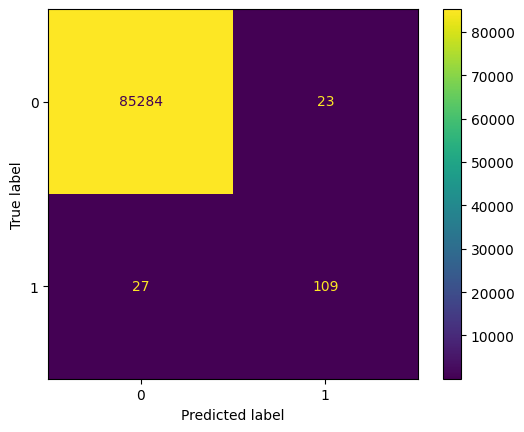

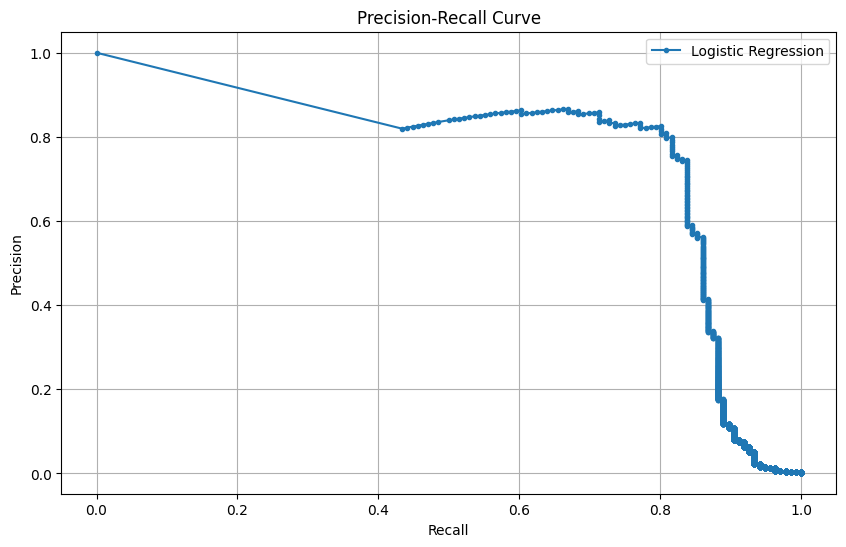

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_new)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Find the threshold that gives the best balance
best_threshold = thresholds[(precision * recall).argmax()]

# Make new predictions using the best threshold
y_pred_new = (y_prob >= best_threshold).astype(int)

# Calculate new precision and recall
new_precision = precision_score(y_test, y_pred_new)
new_recall = recall_score(y_test, y_pred_new)

print(f'New Precision: {new_precision:.2f}, New Recall: {new_recall:.2f}')


New Precision: 0.83, New Recall: 0.80
